In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

## 1) 載入資料集

In [ ]:
wine = load_wine()
df_data = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= ["alcohol","malic_acid","ash","alcalinity_of_ash","magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280/od315_of_diluted_wines","proline","age"])
df_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,age
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


## 2) 切割訓練集與測試集

In [ ]:
from sklearn.model_selection import train_test_split
X = df_data.drop(labels=['age'],axis=1).values # 移除age並取得剩下欄位資料
y = df_data['age'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (124, 13)
test shape: (54, 13)


## 建立 k-nearest neighbors(KNN) 模型
Parameters:
- n_neighbors: 設定鄰居的數量(k)，選取最近的k個點，預設為5。
- algorithm: 搜尋數演算法{'auto'，'ball_tree'，'kd_tree'，'brute'}，可選。
- metric: 計算距離的方式，預設為歐幾里得距離。

Attributes:
- classes_: 取得類別陣列。
- effective_metric_: 取得計算距離的公式。

Methods:
- fit: 放入X、y進行模型擬合。
- predict: 預測並回傳預測類別。
- score: 預測成功的比例。

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 建立 KNN 模型
knnModel = KNeighborsClassifier(n_neighbors=3)
# 使用訓練資料訓練模型
knnModel.fit(X_train,y_train)
# 使用訓練資料預測分類
predicted = knnModel.predict(X_train)

## 使用Score評估模型

In [ ]:
# 預測成功的比例
print('訓練集: ',knnModel.score(X_train,y_train))
print('測試集: ',knnModel.score(X_test,y_test))

訓練集:  0.8548387096774194
測試集:  0.6851851851851852


## 測試集真實分類

In [ ]:
# 建立測試集的 DataFrme
df_test=pd.DataFrame(X_test, columns= ["alcohol","malic_acid","ash","alcalinity_of_ash","magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280/od315_of_diluted_wines","proline"])
df_test['age'] = y_test
pred = knnModel.predict(X_test)
df_test['Predict'] = pred

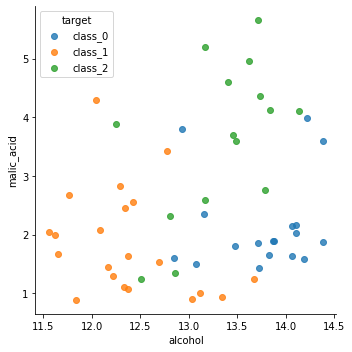

In [ ]:
sns.lmplot(x="alcohol", y="malic_acid", hue='age', data=df_test, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['class_0', 'class_1', 'class_2'])
plt.show()

## KNN (測試集)預測結果

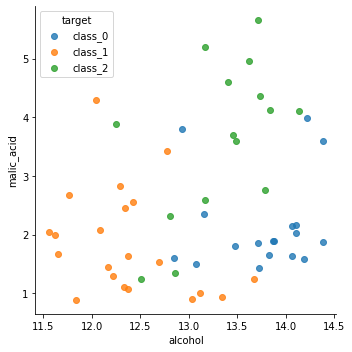

In [ ]:
sns.lmplot(x="alcohol", y="malic_acid", data=df_test, hue="age", fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['class_0', 'class_1', 'class_2'])
plt.show()

# 進階學習
## 查看不同的K分類結果
為了方便視覺化我們將原有的測試集特徵使用PCA降成2維。接著觀察在不同 K 的狀況下，分類的情形為何。

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                            np.arange(x2_min,x2_max,resolution))

    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
            alpha=0.8, c=[cmap(idx)], marker=markers[idx],label=cl)
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:,1], c='',
            alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')

In [ ]:
def knn_model(plot_dict, X, y, k):
    #create model
    model = KNeighborsClassifier(n_neighbors=k)

    #training
    model.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    if k in plot_dict:
        plt.subplot(plot_dict[k])
        plt.tight_layout()
        plot_decision_regions(X,y,model)
        plt.title('Plot for K: %d'%k )

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, iterated_power=1)
train_reduced = pca.fit_transform(X_train)
test_reduced = pca.fit_transform(X_test)

### KNN 訓練集 PCA 2 features

In [ ]:
plt.figure(figsize=(8.5, 6))

# 調整 K
plot_dict = {1:231,2:232,3:233,6:234,10:235,15:236}
for i in plot_dict:
    knn_model(plot_dict, train_reduced, y_train, i)

NameError: ignored